In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.interpolate import UnivariateSpline, CubicSpline
from pandas import DataFrame

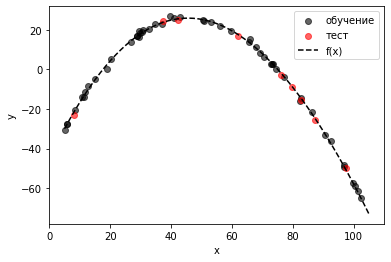

In [20]:
np.random.seed(13)

def y_func(x):
    return (25 + 0.02*x - 0.03*(x - 45)**2 + 0.00006*(x - 54)**3)

n_all, train_percent = 60, 0.85 #
x_min, x_max = 5, 105
me, sigma = 0, 1

x = np.random.uniform(x_min, x_max, n_all)
res = np.random.normal(me, sigma, n_all)
in_train = np.random.choice(np.arange(n_all), int(n_all * train_percent),
                           replace=False)

y = y_func(x) + res

x_line = np.linspace(x_min, x_max, n_all)
y_line = y_func(x_line)

x_train = x[in_train]
y_train = y[in_train]

x_test = np.delete(x, in_train)
y_test = np.delete(y, in_train)

plt.scatter(x_train, y_train, color='black', label='обучение', alpha=0.6)
plt.scatter(x_test, y_test, color='red', label='тест', alpha=0.6)
plt.plot(x_line, y_line, color='black', linestyle='dashed', label='f(x)')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

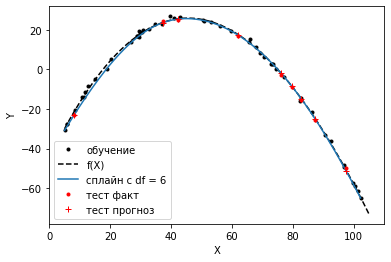

In [21]:
my_df = 6

x_train_uni = np.linspace(x_min, x_max, num=my_df+2)

knots_index = []

for u in x_train_uni:
    min_ind = np.argmin(abs(x_train-u))
    if min_ind not in knots_index:
        knots_index.append(min_ind)
        
y_train_knots = y_train[knots_index]
x_train_knots = sorted(x_train[knots_index])

y_train_knots_index = sorted(range(len(y_train_knots)), key=lambda k: x_train_knots[k])
y_train_knots = y_train_knots[y_train_knots_index]

spl = CubicSpline(x_train_knots, y_train_knots)

y_hat_test = spl(x_test)

plt.plot(x_train, y_train, color='black', ls='', marker='.', label='обучение')
plt.plot(x_line, y_line, color='black', ls='dashed', marker='', label='f(X)')

x_train_for_plot = np.linspace(min(x_train_knots),  max(x_train_knots), num=300)
y_train_for_plot = spl(x_train_for_plot)

plt.plot(x_train_for_plot, y_train_for_plot, marker='', label=f'сплайн с df = {my_df}')
plt.plot(x_test, y_test, color='red', ls='', marker='.', label='тест факт')
plt.plot(x_test, y_hat_test, color='red', ls='', marker='+', label='тест прогноз')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()